# Regression Practice

설치할 라이브러리: ``numpy``, ``pandas``, ``matplotlib``, ``seaborn``,  ``scikit-learn``, ``statsmodels``

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Auto Dataset


A data frame with 392 observations on the following 9 variables.

- mpg: miles per gallon
- cylinders: Number of cylinders between 4 and 8
- displacement: Engine displacement (cu. inches)
- horsepower: Engine horsepower
- weight: Vehicle weight (lbs.)
- acceleration: Time to accelerate from 0 to 60 mph (sec.)
- year: Model year (modulo 100)
- origin: Origin of car (1. American, 2. European, 3. Japanese)
- name: Vehicle name

| 변수명         | 영문 설명                                                        | 한글 설명                                                        |
|----------------|-------------------------------------------------------------------|------------------------------------------------------------------|
| **mpg**         | miles per gallon                                                 | 연비 (갤런당 마일 수, 즉 연료 1갤런으로 몇 마일 주행 가능한지)   |
| **cylinders**   | Number of cylinders between 4 and 8                              | 실린더 수 (4개~8개 사이)                                         |
| **displacement**| Engine displacement (cu. inches)                                 | 엔진 배기량 (세제곱 인치 단위)                                   |
| **horsepower**  | Engine horsepower                                                | 마력 (엔진 출력)                                                 |
| **weight**      | Vehicle weight (lbs.)                                            | 차량 무게 (파운드 단위)                                          |
| **acceleration**| Time to accelerate from 0 to 60 mph (sec.)                      | 0에서 60마일(약 96km/h)까지 도달하는 데 걸리는 시간 (초 단위)   |
| **year**        | Model year (modulo 100)                                          | 제조 연도 (예: 70은 1970년, 82는 1982년)                         |
| **origin**      | Origin of car (1. American, 2. European, 3. Japanese)            | 제조국 (1: 미국, 2: 유럽, 3: 일본)                               |
| **name**        | Vehicle name                                                     | 차량 이름 (제조사 및 모델명 포함된 문자열)                      |


In [2]:
from ISLP import load_data
df = load_data('Auto')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


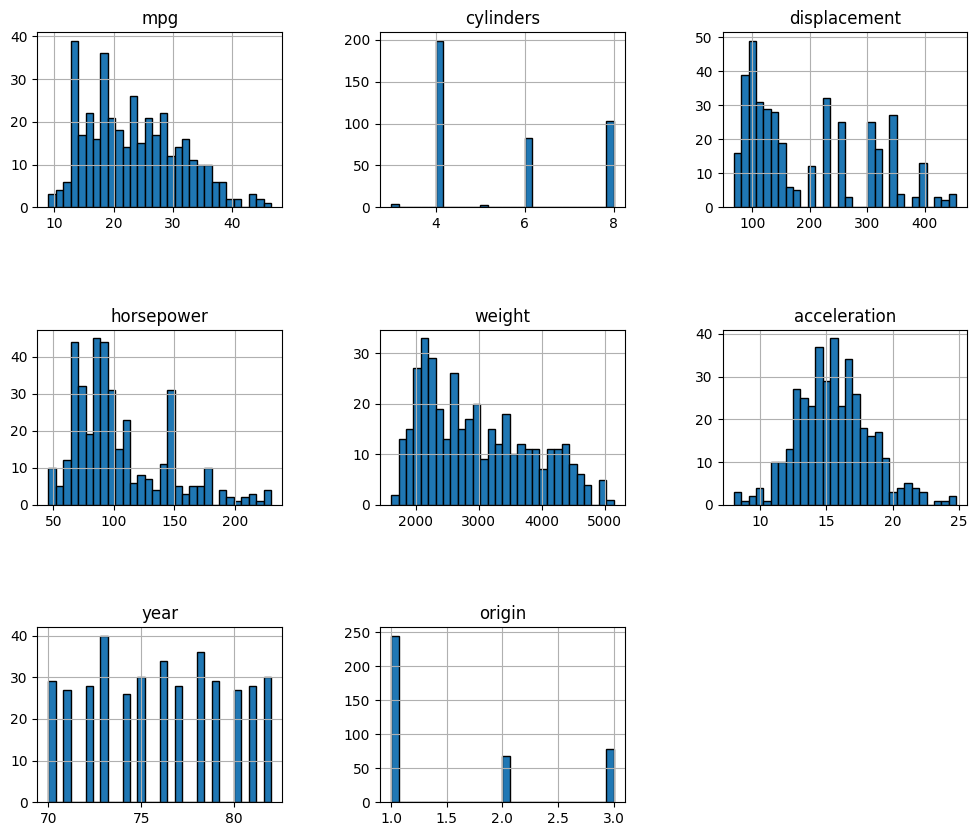

In [3]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 35.7+ KB


## Convert the variable type

In [5]:
df['origin'] = df['origin'].astype('category')
(df.info())
df


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    int64   
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   year          392 non-null    int64   
 7   origin        392 non-null    category
dtypes: category(1), float64(3), int64(4)
memory usage: 33.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [6]:
# assign the category name
df['origin'] = df['origin'].cat.rename_categories(['American','European','Japanese'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,American
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,American
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,American
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,American
ford torino,17.0,8,302.0,140,3449,10.5,70,American
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,American
vw pickup,44.0,4,97.0,52,2130,24.6,82,European
dodge rampage,32.0,4,135.0,84,2295,11.6,82,American


In [ ]:
df['origin'].value_counts()

origin
American    245
Japanese     79
European     68
Name: count, dtype: int64

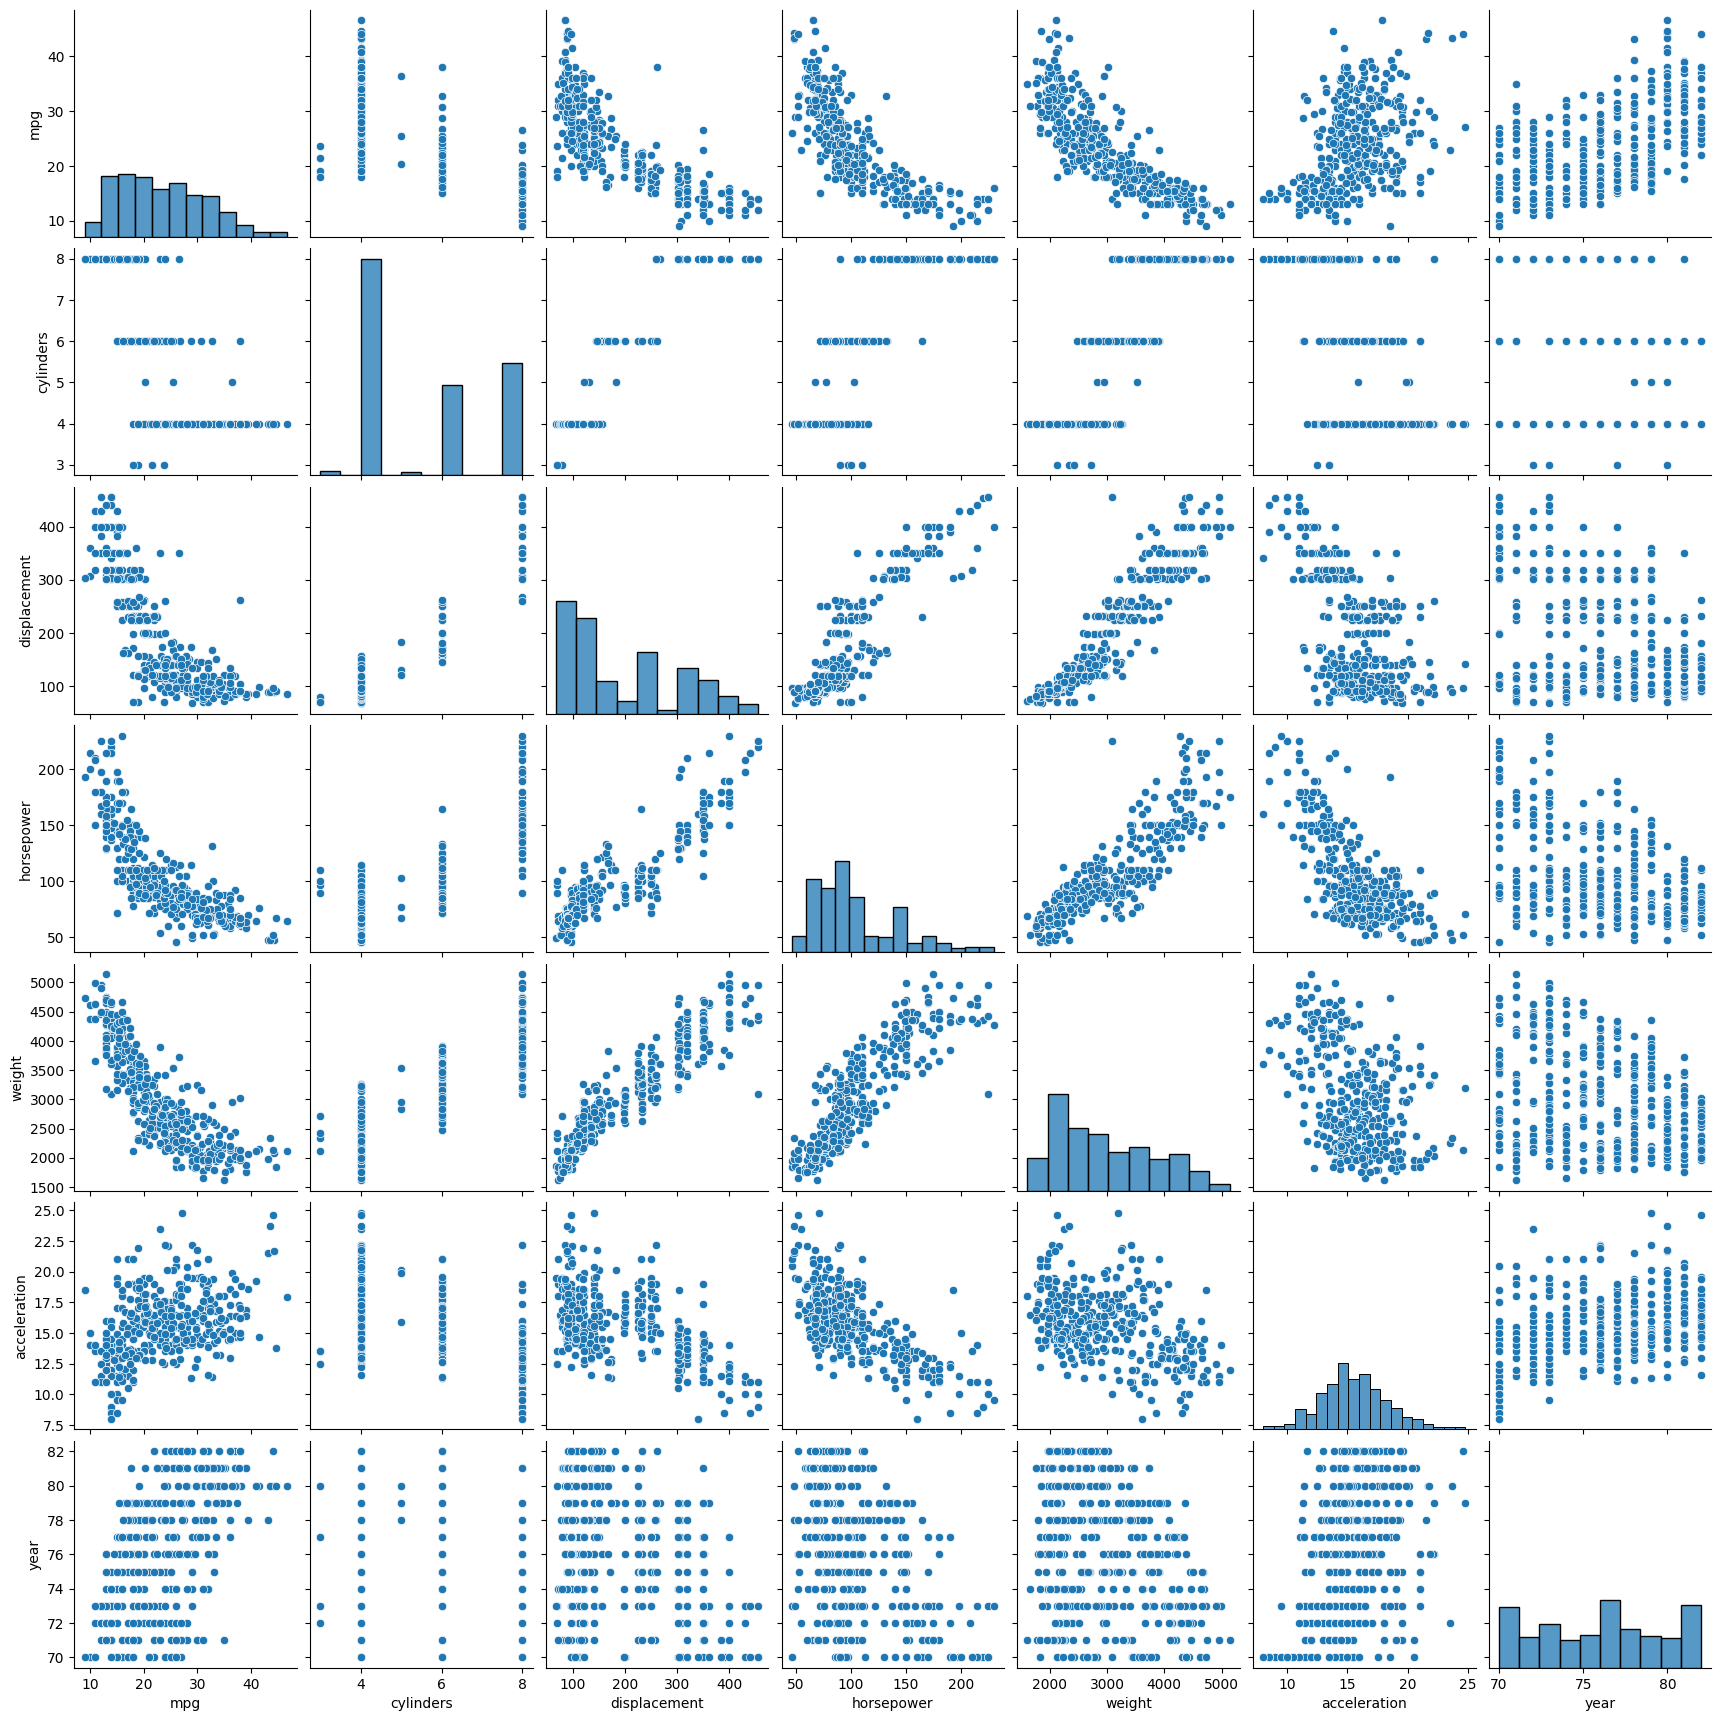

In [8]:
sns.pairplot(df)

## Run Linear Regression

In [9]:
import statsmodels.api as sm
X = df['horsepower']
y = df['mpg']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           7.03e-81
Time:                        12:07:44   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

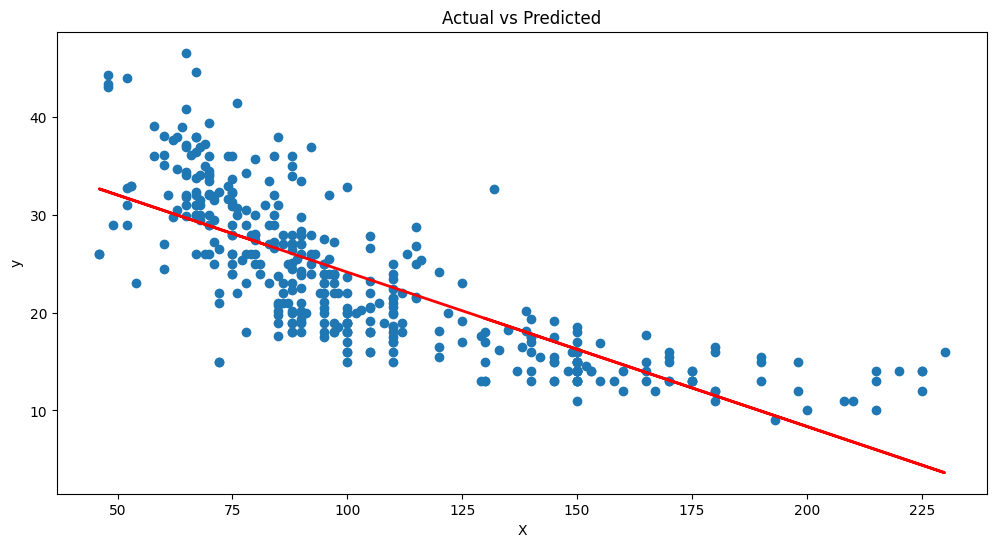

In [10]:
# Predict values
y_pred = est2.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(df['horsepower'], df['mpg'], 'o')           # scatter plot showing actual data
plt.plot(df['horsepower'], y_pred, 'r', linewidth=2)   # regression line
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

## Residual Plot

잔차분석을 해보면 선형가정이 만족되지 않음을 쉽게 확인해볼 수 있다.

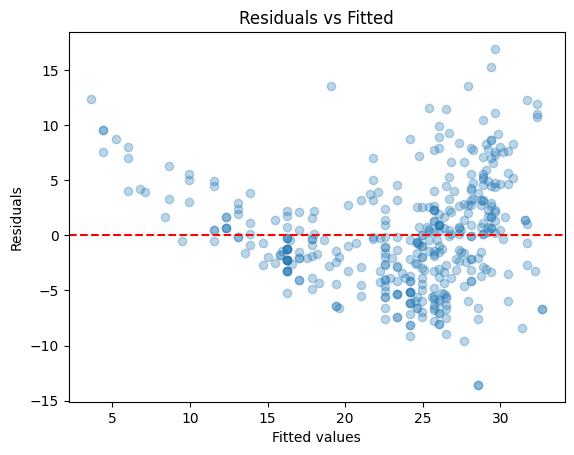

In [11]:
residuals = y - y_pred

plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
X_arr = np.array(X).reshape(-1,1)
print(X_arr)
xp = polynomial_features.fit_transform(X_arr)
xp


[[130]
 [165]
 [150]
 [150]
 [140]
 [198]
 [220]
 [215]
 [225]
 [190]
 [170]
 [160]
 [150]
 [225]
 [ 95]
 [ 95]
 [ 97]
 [ 85]
 [ 88]
 [ 46]
 [ 87]
 [ 90]
 [ 95]
 [113]
 [ 90]
 [215]
 [200]
 [210]
 [193]
 [ 88]
 [ 90]
 [ 95]
 [100]
 [105]
 [100]
 [ 88]
 [100]
 [165]
 [175]
 [153]
 [150]
 [180]
 [170]
 [175]
 [110]
 [ 72]
 [100]
 [ 88]
 [ 86]
 [ 90]
 [ 70]
 [ 76]
 [ 65]
 [ 69]
 [ 60]
 [ 70]
 [ 95]
 [ 80]
 [ 54]
 [ 90]
 [ 86]
 [165]
 [175]
 [150]
 [153]
 [150]
 [208]
 [155]
 [160]
 [190]
 [ 97]
 [150]
 [130]
 [140]
 [150]
 [112]
 [ 76]
 [ 87]
 [ 69]
 [ 86]
 [ 92]
 [ 97]
 [ 80]
 [ 88]
 [175]
 [150]
 [145]
 [137]
 [150]
 [198]
 [150]
 [158]
 [150]
 [215]
 [225]
 [175]
 [105]
 [100]
 [100]
 [ 88]
 [ 95]
 [ 46]
 [150]
 [167]
 [170]
 [180]
 [100]
 [ 88]
 [ 72]
 [ 94]
 [ 90]
 [ 85]
 [107]
 [ 90]
 [145]
 [230]
 [ 49]
 [ 75]
 [ 91]
 [112]
 [150]
 [110]
 [122]
 [180]
 [ 95]
 [100]
 [100]
 [ 67]
 [ 80]
 [ 65]
 [ 75]
 [100]
 [110]
 [105]
 [140]
 [150]
 [150]
 [140]
 [150]
 [ 83]
 [ 67]
 [ 78]
 [ 52]

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       ...,
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]], shape=(392, 3))

In [18]:
model = sm.OLS(y, xp).fit()
ypred = model.predict(xp) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           5.40e-99
Time:                        12:08:18   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9001      1.800     31.604      0.000      53.360      60.440
x1            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
x2             0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Use Scikit-Learn

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [20]:
LR = LinearRegression()
LR.fit(X_arr,y)
print(LR.intercept_, LR.coef_)

39.935861021170474 [-0.15784473]


In [21]:
PR2 = PolynomialFeatures(degree = 2)
PR2.fit_transform(X_arr)

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       ...,
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]], shape=(392, 3))

In [22]:
LR2 = LinearRegression(fit_intercept=False) # intercept 텀은 위 polynomial fit transform 에서 이미 반영됨
poly_out = LR2.fit(PR2.fit_transform(X_arr),y)
print(poly_out.intercept_, poly_out.coef_)

0.0 [ 5.69000997e+01 -4.66189630e-01  1.23053610e-03]


## Use Pipeline

In [23]:
from sklearn.pipeline import Pipeline
poly2 = Pipeline(steps=[
    ('poly2-feature', PolynomialFeatures(degree=2, include_bias=False)),
    ('LinReg', LinearRegression())
])


In [24]:
poly_out2 = poly2.fit(X_arr,y)
poly_out2

,steps,"[('poly2-feature', ...), ('LinReg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


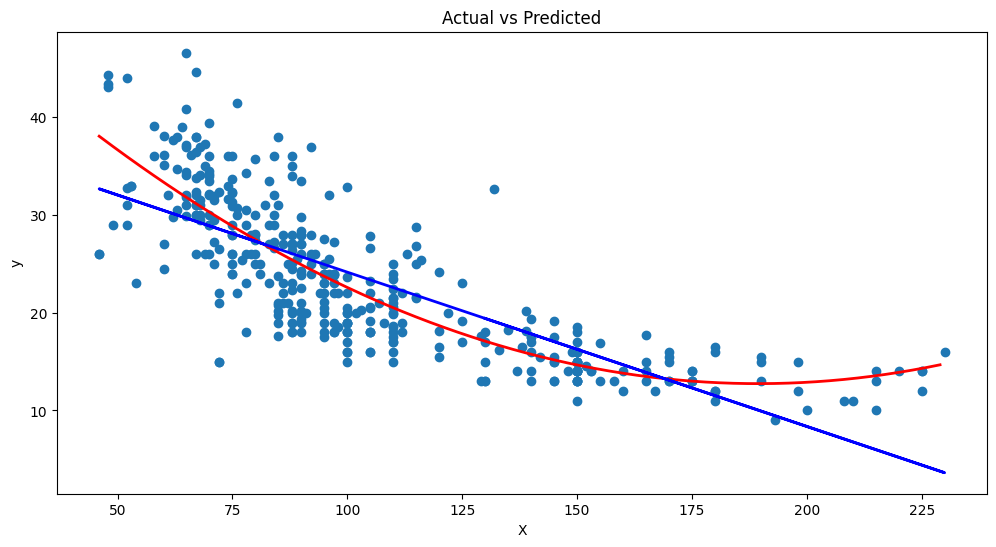

In [25]:
xgrid= np.arange(X_arr.min(), X_arr.max()).reshape(-1,1)
# Predict values
y_pred = poly_out2.predict(xgrid)

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(df['horsepower'], df['mpg'], 'o')           # scatter plot showing actual data
plt.plot(xgrid, y_pred, 'r', linewidth=2)   # polynomial regression line
plt.plot(df['horsepower'], est2.predict(), 'b', linewidth=2)   # linear regression line
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

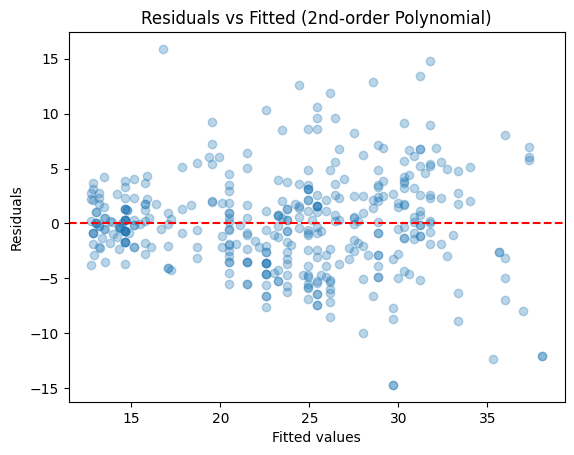

In [26]:
y_pred = poly_out2.predict(X_arr)
residuals = y - y_pred

plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (2nd-order Polynomial)")
plt.show()

# Model Selection

## Validation Set Approach

In [27]:
from sklearn import model_selection
x_train, x_test, y_train, y_test= model_selection.train_test_split(df['horsepower'],df['mpg'], test_size=0.30, random_state = 0, shuffle=True)
# reshape
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [28]:
print(x_train.shape)
print(x_test.shape)

(274, 1)
(118, 1)


In [29]:
poly_out2 = poly2.fit(x_train,y_train)
train_mse = ((poly_out2.predict(x_train) - y_train)**2).mean()
test_mse = ((poly_out2.predict(x_test) - y_test)**2).mean()

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Train MSE: 19.982233992281813
Test MSE: 16.804182817075155


In [30]:
for degree in range(10):
    print(degree+1)

1
2
3
4
5
6
7
8
9
10


In [31]:
train_mse = []
test_mse = []
for degree in range(10):
    d = degree + 1
    poly_d = Pipeline(steps=[
        ('poly2-feature', PolynomialFeatures(degree=d, include_bias=False)),
        ('LinReg', LinearRegression())
    ])
    poly_out_d = poly_d.fit(x_train,y_train)
    train_mse.append(((poly_out_d.predict(x_train) - y_train)**2).mean())
    test_mse.append(((poly_out_d.predict(x_test) - y_test)**2).mean())

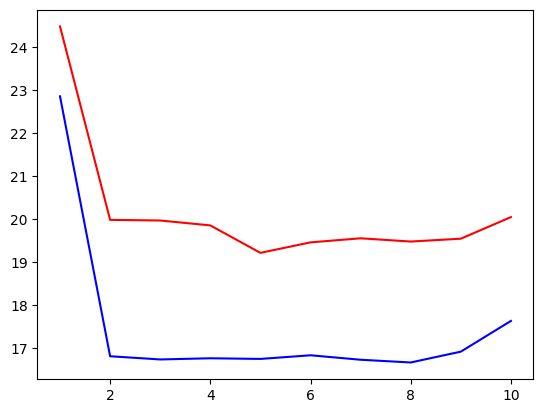

In [32]:
grid = np.arange(10)+1
plt.plot(grid, train_mse, 'r')
plt.plot(grid, test_mse, 'b')

Randomness?

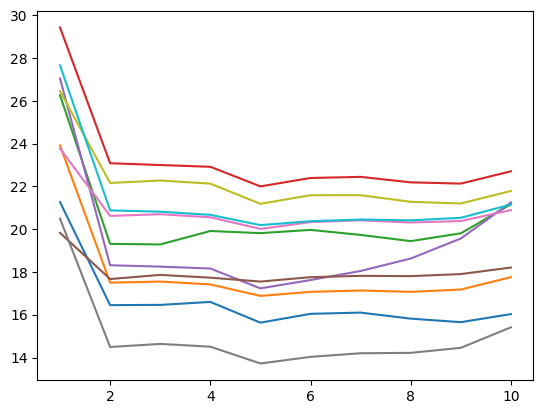

In [33]:
for i in range(10):
    x_train, x_test, y_train, y_test= model_selection.train_test_split(df['horsepower'],df['mpg'], test_size=0.30, shuffle=True)
    # reshape
    x_train = np.array(x_train).reshape(-1,1)
    x_test = np.array(x_test).reshape(-1,1)
    train_mse = []
    test_mse = []
    for degree in range(10):
        d = degree + 1
        poly_d = Pipeline(steps=[
            ('poly2-feature', PolynomialFeatures(degree=d, include_bias=False)),
            ('LinReg', LinearRegression())
        ])
        poly_out_d = poly_d.fit(x_train,y_train)
        train_mse.append(((poly_out_d.predict(x_train) - y_train)**2).mean())
        test_mse.append(((poly_out_d.predict(x_test) - y_test)**2).mean())
    plt.plot(grid, test_mse)

## LOCCV & K-FOLD CV

In [29]:
n = len(df)
n

392

/tmp/ipykernel_1539706/565015930.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_idx], y[test_idx]
/tmp/ipykernel_1539706/565015930.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_idx], y[test_idx]
/tmp/ipykernel_1539706/565015930.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_idx], y[test_idx]
/tmp/ipykernel_1539706/565015930.py:14: Future

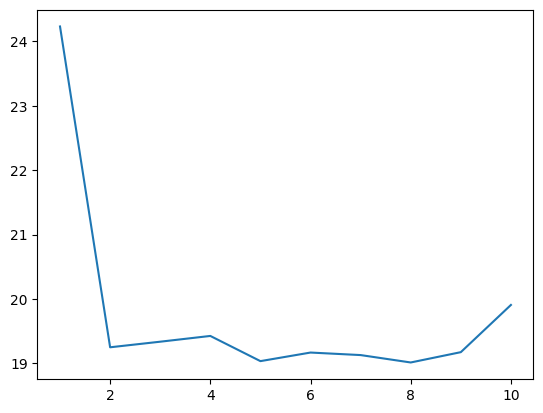

In [30]:
from sklearn.model_selection import KFold

# LOOCV
K = n

kf = KFold(n_splits=K, shuffle = True, random_state = 0)

kfold_cv = []
for degree in range(10):
    d = degree + 1
    test_mse = []
    for train_idx, test_idx in kf.split(X_arr, y):
        x_train, x_test = X_arr[train_idx,:], X_arr[test_idx,:]
        y_train, y_test = y[train_idx], y[test_idx]
        poly_d = Pipeline(steps=[
            ('poly2-feature', PolynomialFeatures(degree=d, include_bias=False)),
            ('LinReg', LinearRegression())
        ])
        poly_out_d = poly_d.fit(x_train,y_train)
        test_mse.append(((poly_out_d.predict(x_test) - y_test)**2).mean())
    kfold_cv.append(np.mean(test_mse))
plt.plot(np.arange(10)+1, kfold_cv)
    

/tmp/ipykernel_1539706/1609372053.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_idx], y[test_idx]
/tmp/ipykernel_1539706/1609372053.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_idx], y[test_idx]
/tmp/ipykernel_1539706/1609372053.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_idx], y[test_idx]
/tmp/ipykernel_1539706/1609372053.py:12: Fu

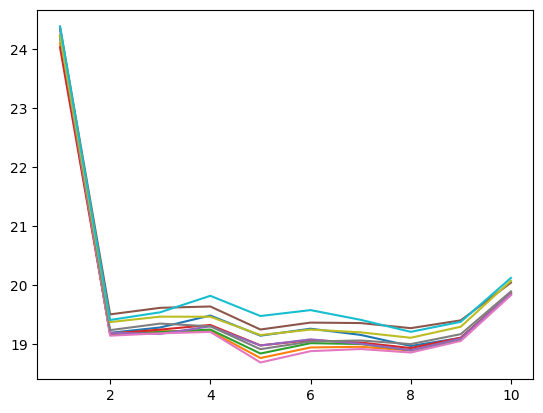

In [31]:
# 10-fold CV
for kk in range(10):
    K = 10
    kf = KFold(n_splits=K, shuffle = True, random_state = kk)

    kfold_cv = []
    for degree in range(10):
        d = degree + 1
        test_mse = []
        for train_idx, test_idx in kf.split(X_arr, y):
            x_train, x_test = X_arr[train_idx,:], X_arr[test_idx,:]
            y_train, y_test = y[train_idx], y[test_idx]
            poly_d = Pipeline(steps=[
                ('poly2-feature', PolynomialFeatures(degree=d, include_bias=False)),
                ('LinReg', LinearRegression())
            ])
            poly_out_d = poly_d.fit(x_train,y_train)
            test_mse.append(((poly_out_d.predict(x_test) - y_test)**2).mean())
        kfold_cv.append(np.mean(test_mse))
    plt.plot(np.arange(10)+1, kfold_cv)